In [2]:
import pandas as pd

In [7]:
import numpy as np
import sklearn

In [5]:
import matplotlib.pyplot as plt

In [6]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import load_iris

In [10]:
iris=load_iris()

In [11]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df.shape

(150, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [17]:
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [19]:
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [20]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


[Text(0.5, 0, 'range'), Text(0, 0.5, 'features')]

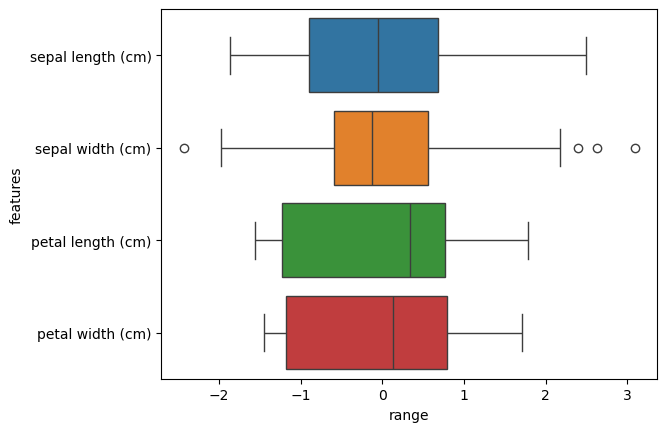

In [22]:
import seaborn as sns
sns.boxplot(data=df_scaled,orient="h").set(xlabel="range",ylabel="features")

In [31]:
def get_outliers(X):
    Q1=np.quantile(X,0.25)
    Q3=np.quantile(X,0.75)

    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    outlier=X[(X<=lower_bound)|(X>=upper_bound)]
    outlier_indices=np.where((X<=lower_bound)|(X>=upper_bound))
    return outlier,outlier_indices[0].tolist()

In [27]:
df_copy=df_scaled.copy()

In [29]:
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [30]:
df.reset_index(drop=True,inplace=True)

In [33]:
outliers,outliers_indices=get_outliers(df["sepal width (cm)"].to_numpy())

In [34]:
print(outliers,outliers_indices)

[4.4 4.1 4.2 2. ] [15, 32, 33, 60]


In [35]:
df_copy.drop(outliers_indices,inplace=True)
df_copy.reset_index(drop=True,inplace=True)

In [37]:
df_copy.shape

(146, 4)

[Text(0.5, 0, 'ranges'), Text(0, 0.5, 'features')]

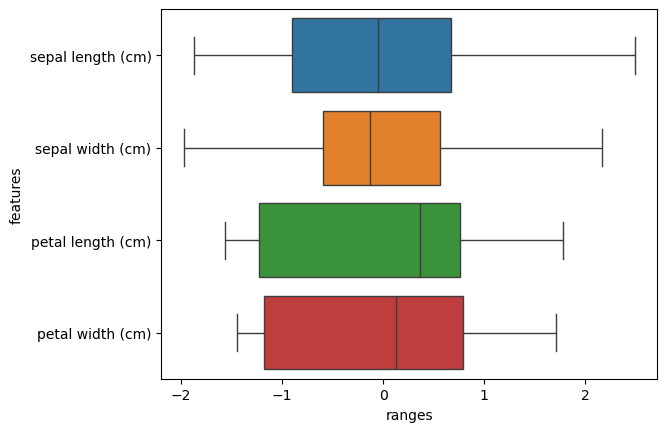

In [38]:
sns.boxplot(data=df_copy,orient="h").set(xlabel="ranges",ylabel="features")

In [39]:
corr_nat=df_copy.corr(method="pearson")
corr_nat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123144,0.879362,0.822587
sepal width (cm),-0.123144,1.000000,-0.406141,-0.340602
petal length (cm),0.879362,-0.406141,1.000000,0.961866
petal width (cm),0.822587,-0.340602,0.961866,1.000000


([<matplotlib.axis.YTick at 0x1cc3c44e850>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

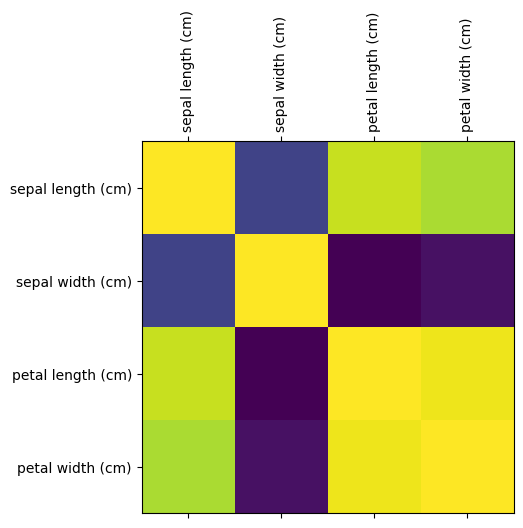

In [40]:
plt.matshow(corr_nat)
plt.xticks(range(len(corr_nat.columns)),corr_nat.columns,rotation=90)
plt.yticks(range(len(corr_nat.columns)),corr_nat.columns)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=3)
df_pca=pca.fit_transform(df_copy)

In [43]:
df_pca

array([[-2.28605542e+00,  6.27485751e-01,  1.27434252e-01],
       [-2.16282079e+00, -5.34220843e-01,  2.35697886e-01],
       [-2.42829949e+00, -1.88327563e-01, -4.34873615e-02],
       [-2.37672761e+00, -4.47285051e-01, -9.02370060e-02],
       [-2.40225438e+00,  8.00170160e-01, -1.61905297e-02],
       [-2.04463048e+00,  1.62514614e+00, -2.84458151e-02],
       [-2.48761318e+00,  2.04234667e-01, -3.35202479e-01],
       [-2.26756431e+00,  3.69052724e-01,  8.87489245e-02],
       [-2.43898770e+00, -9.62577722e-01, -1.43414712e-01],
       [-2.25515382e+00, -3.24554611e-01,  2.54655817e-01],
       [-2.15840102e+00,  1.18539050e+00,  2.67734855e-01],
       [-2.36527217e+00,  2.83304106e-01, -9.35611855e-02],
       [-2.30282425e+00, -5.81938716e-01,  2.32099123e-01],
       [-2.72903812e+00, -7.93425723e-01, -1.79322411e-01],
       [-2.14848003e+00,  2.00330166e+00,  4.70913736e-01],
       [-2.17695356e+00,  1.62724399e+00,  3.81145130e-03],
       [-2.21144627e+00,  6.32591546e-01

In [44]:
from sklearn.mixture import GaussianMixture


In [45]:
n_clusters=3
model_gmm=GaussianMixture(n_components=n_clusters,random_state=42)
gmm_labels=model_gmm.fit_predict(df_pca)


# Result

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
gmm_silhouette=silhouette_score(df_pca,gmm_labels)
print(gmm_silhouette)

0.3681613987792376


# Visualisation

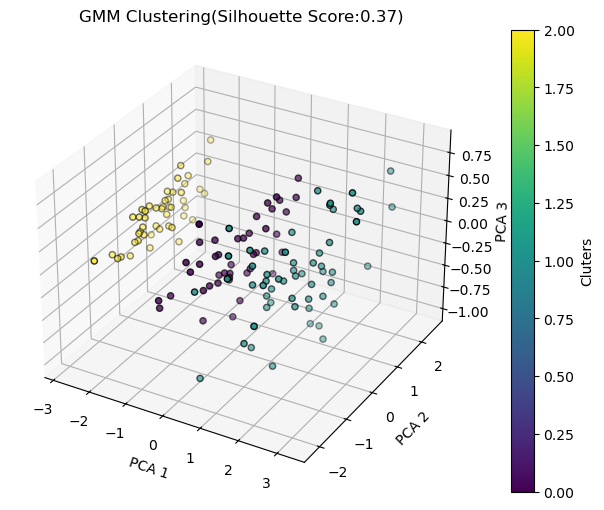

In [49]:
img=plt.figure(figsize=(10,6))
ax=img.add_subplot(111,projection="3d")
scatter=ax.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=gmm_labels,cmap="viridis",marker="o",edgecolors="k")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title(f"GMM Clustering(Silhouette Score:{gmm_silhouette:.2f})")
#add colorbar for reference
colorbar=plt.colorbar(scatter)
colorbar.set_label("Cluters")
plt.show()